## 2. Data Cleaning, preprocessing, and EDA

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
sns.set_style("darkgrid")

import nltk
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import wordninja


%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yegmo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yegmo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [132]:
depression = pd.read_csv('../data/depression.csv')
anxiety = pd.read_csv('../data/anxiety.csv')

In [3]:
pd.set_option('display.max_columns', 500)
depression.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday,is_anxiety
0,NaN,depression,We understand that most people who reply immed...,t2_1t70,False,NaN,1,False,Our most-broken and least-understood rules is ...,[],r/depression,False,0.0,NaN,0,NaN,False,t3_doqwow,False,dark,1.00,NaN,public,2319,294,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,2319,NaN,True,NaN,False,NaN,[],"{'gid_1': 15, 'gid_2': 1}",NaN,True,NaN,1.572390e+09,text,0.0,NaN,NaN,text,self.depression,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,confidence,NaN,NaN,True,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,False,NaN,[],False,NaN,NaN,moderator,t5_2qqqf,NaN,NaN,NaN,doqwow,True,NaN,SQLwitch,NaN,175,True,no_ads,False,[],False,NaN,/r/depression/comments/doqwow/our_mostbroken_a...,no_ads,True,https://www.reddit.com/r/depression/comments/d...,755513,1.572361e+09,2,NaN,False,NaN,0
1,NaN,depression,Welcome to /r/depression's check-in post - a p...,t2_1t70,False,NaN,0,False,"Regular Check-In Post, with important reminder...",[],r/depression,False,0.0,NaN,0,NaN,False,t3_m246c4,False,dark,1.00,NaN,public,312,23,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,312,NaN,True,NaN,False,NaN,[],{'gid_1': 5},NaN,True,NaN,1.615428e+09,text,0.0,NaN,NaN,text,self.depression,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,new,NaN,NaN,False,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,False,NaN,[],False,NaN,NaN,moderator,t5_2qqqf,NaN,NaN,NaN,m246c4,True,NaN,SQLwitch,NaN,1136,False,no_ads,False,[],False,NaN,/r/depression/comments/m246c4/regular_checkin_...,no_ads,True,https://www.reddit.com/r/depression/comments/m...,755513,1.615400e+09,0,NaN,False,NaN,0
2,NaN,depression,I'm so low rn I can't even type anything coher...,t2_8oa0yyky,False,NaN,0,False,Low,[],r/depression,False,0.0,NaN,0,NaN,False,t3_n728cp,False,dark,1.00,NaN,public,263,3,{},NaN,False,[],NaN,False,False,NaN,{},NaN,False,263,NaN,False,NaN,False,NaN,[],{'gid_1': 3},NaN,True,NaN,1.620433e+09,text,0.0,NaN,NaN,text,self.depression,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",NaN,confidence,NaN,NaN,False,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,False,NaN,[],False,NaN,NaN,NaN,t5_2qqqf,NaN,NaN,NaN,n728cp,True,NaN,RagingFlock89,NaN,43,True,no_ads,False,[],False,NaN,/r/depression/comments/n728cp/low/,no_ads,False,https://www.reddit.com/r/depression/comments/n...,755513,1.620404e+09,0,NaN,False,NaN,0
3,NaN,depression,When I wake up after 8 hours of decent sleep I...,t2_8bk84r51,False,NaN,0,False,I’m always amazed at how much energy healthy p...,

### 2.1 Data Cleaning

In [4]:
dep_columns = depression[["title", "selftext", "author", "score", "num_comments", "is_anxiety", "url"]]
anx_columns = anxiety[["title", "selftext", "author", "score", "num_comments", "is_anxiety", "url"]]

combined_data = pd.concat([dep_columns, anx_columns], axis=0, ignore_index=True)
combined_data.to_csv('../data/combined_data.csv', index = False)
combined_data

,title,selftext,author,score,num_comments,is_anxiety,url
0,Our most-broken and least-understood rules is ...,We understand that most people who reply immed...,SQLwitch,2319,175,0,https://www.reddit.com/r/depression/comments/d...
1,"Regular Check-In Post, with important reminder...",Welcome to /r/depression's check-in post - a p...,SQLwitch,312,1136,0,https://www.reddit.com/r/depression/comments/m...
2,Low,I'm so low rn I can't even type anything coher...,RagingFlock89,263,43,0,https://www.reddit.com/r/depression/comments/n...
3,I’m always amazed at how much energy healthy p...,When I wake up after 8 hours of decent sleep I...,cezzzie,1281,120,0,https://www.reddit.com/r/depression/comments/n...
4,30 and never lived a day in my life,I guess i have always been depressed but never...,ApprehensiveYou2385,36,5,0,https://www.reddit.com/r/depression/comments/n...
...,...,...,...,...,...,...,...
1925,Any tips on how not to panic during a midterm?,I have an Applied Statics midterm tomorrow. I ...,Anomalistic_Username,2,0,1,https://www.reddit.com/r/Anxiety/comments/n3p5...
1926,"I find myself apologizing really often, checki...",I've recently decided to stop smoking weed (so...,zedhenson,3,1,1,https://www.reddit.com/r/Anxiety/comments/n3n1...
1927,I typed out my anxiety attack and thought I sh...,I recently got into a little habit where when ...,Tree-Nui-Tee,2,4,1,https://www.reddit.com/r/Anxiety/comments/n3oz...
1928,something happened that just triggered my anxi...,i need someone to vent to please,Capzfan5,8,5,1,https://www.reddit.com/r/Anxiety/comments/n3gc...


In [5]:
#CHECKING OUT THE ROWS WITH MISSING selftext DATA
combined_data[combined_data["selftext"].isnull()].head(10)
#FILLING NaNs
combined_data["selftext"].fillna("emptypost", inplace=True)

### 2.2 Pre-processing
As the posts are written by different humans, they come in different forms. In order to prepare the data for our classifier, we will have to take steps to pre-process the posts. 

> **Build processing functions** - We will build a processing function that will help change the text to lowercase, remove punctuations, reduce related words down to a common base word. With this functions, we can create a seperate column for our clean data. 


In [6]:
def processing_text(series_to_process):
    new_post = []
    new_post_words = []
    broken_sentences = []
    broken_words = []
    
    tokenizer = RegexpTokenizer(r'(\w+)')
    lemmatizer = WordNetLemmatizer()
    
    for i in range(len(series_to_process)):
        dirty_string = (series_to_process)[i].lower()
        
        sentences = sent_tokenize(dirty_string)
        broken_sentences.append(sentences)
        
        #WORDS_ONLY IS A LIST THAT DOESN'T HAVE PUNCTUATION
        words_only = tokenizer.tokenize(dirty_string) 
        broken_words.append(words_only)
        
        words_only_lem = [lemmatizer.lemmatize(i) for i in words_only]
        words_without_stop = [i for i in words_only_lem if i not in stopwords.words("english")]
        
        new_post_words.append(words_without_stop)
        
        #RETURN SEPERATED WORDS INTO LONG STRING
        long_string_clean = " ".join(word for word in words_without_stop)
        
        new_post.append(long_string_clean)
        
    return new_post, broken_sentences, broken_words, new_post_words

In [7]:
#CHECKING TO SEE NEW COLUMNS WERE ADDED

combined_data["selftext_clean"], combined_data["selftext_broken_sentences"], _, combined_data["selftext_broken_words"] = processing_text(combined_data["selftext"])
combined_data["title_clean"], _, _, _ = processing_text(combined_data["title"])

pd.set_option("display.max_colwidth", 100)
combined_data.head(10)

,title,selftext,author,score,num_comments,is_anxiety,url,selftext_clean,selftext_broken_sentences,selftext_broken_words,title_clean
0,"Our most-broken and least-understood rules is ""helpers may not invite private contact as a first...",We understand that most people who reply immediately to an OP with an invitation to talk private...,SQLwitch,2319,175,0,https://www.reddit.com/r/depression/comments/doqwow/our_mostbroken_and_leastunderstood_rules_is/,understand people reply immediately op invitation talk privately mean help type response usually...,[we understand that most people who reply immediately to an op with an invitation to talk privat...,"[understand, people, reply, immediately, op, invitation, talk, privately, mean, help, type, resp...",broken least understood rule helper may invite private contact first resort made new wiki explain
1,"Regular Check-In Post, with important reminders about the No Private Contact and No Activism rules",Welcome to /r/depression's check-in post - a place to take a moment and share what is going on a...,SQLwitch,312,1136,0,https://www.reddit.com/r/depression/comments/m246c4/regular_checkin_post_with_important_reminders/,welcome r depression check post place take moment share going accomplishment want talk standalon...,[welcome to /r/depression's check-in post - a place to take a moment and share what is going on ...,"[welcome, r, depression, check, post, place, take, moment, share, going, accomplishment, want, t...",regular check post important reminder private contact activism rule
2,Low,I'm so low rn I can't even type anything coherent..I just want to express I'm at one of my lowes...,RagingFlock89,263,43,0,https://www.reddit.com/r/depression/comments/n728cp/low/,low rn even type anything coherent want express one lowest point stupid thing thanks listening,[i'm so low rn i can't even type anything coherent..i just want to express i'm at one of my lowe...,"[low, rn, even, type, anything, coherent, want, express, one, lowest, point, stupid, thing, than...",low
3,I’m always amazed at how much energy healthy people have.,"When I wake up after 8 hours of decent sleep I’m still exhausted. All day, everyday. Not just “t...",cezzzie,1281,120,0,https://www.reddit.com/r/depression/comments/n6fydg/im_always_amazed_at_how_much_energy_healthy/,wake 8 hour decent sleep still exhausted day everyday tired exhausted exercise help yeah sure do...,"[when i wake up after 8 hours of decent sleep i’m still exhausted., all day, everyday., not just...","[wake, 8, hour, decent, sleep, still, exhausted, day, everyday, tired, exhausted, exercise, help...",always amazed much energy healthy people
4,30 and never lived a day in my life,I guess i have always been depressed but never really thought much of it. I'm now 30 and I'm all...,ApprehensiveYou2385,36,5,0,https://www.reddit.com/r/depression/comments/n6ye5n/30_and_never_lived_a_day_in_my_life/,guess always depressed never really thought much 30 sudden cognizant failure looking back never ...,"[i guess i have always been depressed but never really thought much of it., i'm now 30 and i'm a...","[guess, always, depressed, never, really, thought, much, 30, sudden, cognizant, failure, looking...",30 never lived day life
5,I moved my body today. I was dreading it but I did it and I just felt like sharing.,"According to my health app I've been averaging 321 (yes) steps a day in 2021. Today I reached 7,...",cowoj,616,34,0,https://www.reddit.com/r/depression/comments/n6idcp/i_moved_my_body_today_i_was_dreading_it_but_...,according health app averaging 321 yes step day 2021 today reached 7 000 know might seem like mu...,[according to my health app i've been averaging 321 (yes) steps a day in 2021. today i reached 7...,"[according, health, app, averaging, 321, yes, step, day, 2021, today, reached, 7, 000, know, mig...",moved body today wa dreading felt like sharing
6,24 years old and never date a girl before,Should I be depress? I feel so lonely.,AdventurousFrame4374,17,19,

In [8]:
def processing_author_names(series_to_process):
    author_split = []
    
    for i in range(len(series_to_process)):
        splits_list = wordninja.split(series_to_process[i])
        combined_string = " ".join(splits_list)
        author_split.append(combined_string)
        
    new_list = []
    tokenizer = RegexpTokenizer(r'(\w+)')
    lemmatizer = WordNetLemmatizer()
    
    for i in range(len(author_split)):
        #TOKENISED ITEM(LONG STRING) IN A LIST
        dirty_string = (author_split)[i].lower()
        
        #WORDS_ONLY IS A LIST THAT DOESN'T HAVE PUNCTUATION
        words_only = tokenizer.tokenize(dirty_string) 
        
        #LEMMATISE THE ITEMS IN WORDS_ONLY
        words_only_lem = [lemmatizer.lemmatize(i) for i in words_only]
        
        #REMOVING STOP WORDS FROM THE LEMMATIZED LIST
        words_without_stop = [i for i in words_only_lem if i not in stopwords.words("english")]
        
        #RETURN SEPERATED WORDS INTO LONG STRING
        long_string_clean = " ".join(word for word in words_without_stop)
        
        new_list.append(long_string_clean)
    
    return new_list

In [9]:
combined_data["author_clean"] = processing_author_names(combined_data["author"])

#CHECKING ON author_clean
pd.set_option("display.max_colwidth", 100)
combined_data[["author","author_clean"]].tail(10)

,author,author_clean
1920,khaellar,kha ella r
1921,justborgia,borgia
1922,Dependent_Ad_8358,dependent ad 8358
1923,DumpsterPuff,dumpster puff
1924,hawaiianshirtYT-1300,hawaiian shirt 1300
1925,Anomalistic_Username,mali stic username
1926,zedhenson,zed henson
1927,Tree-Nui-Tee,tree nui tee
1928,Capzfan5,cap z fan 5
1929,PanamaPhys_,panama ph


In [10]:
combined_data.isnull().sum()

title                        0
selftext                     0
author                       0
score                        0
num_comments                 0
is_anxiety                   0
url                          0
selftext_clean               0
selftext_broken_sentences    0
selftext_broken_words        0
title_clean                  0
author_clean                 0
dtype: int64

### 2.3 Exploratory Data Analysis
Some areas to check out:

> **Top words** - This would be our obvious first step in our EDA. To peek and see what are the most used words in the title, posts and usernames.

> **Significant Authors** - This might not really affect the classifier that we are using, but it might be worth it to check out users who post often and users who has posted on both subreddits. 

> **Average length of posts** - We have already noticed a significant number of posts with no words in r/SuicideWatch posts. We should dive in to check out what the number of words are in an average post in each subreddit.  


In [11]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   title                      1930 non-null   object
 1   selftext                   1930 non-null   object
 2   author                     1930 non-null   object
 3   score                      1930 non-null   int64 
 4   num_comments               1930 non-null   int64 
 5   is_anxiety                 1930 non-null   int64 
 6   url                        1930 non-null   object
 7   selftext_clean             1930 non-null   object
 8   selftext_broken_sentences  1930 non-null   object
 9   selftext_broken_words      1930 non-null   object
 10  title_clean                1930 non-null   object
 11  author_clean               1930 non-null   object
dtypes: int64(3), object(9)
memory usage: 181.1+ KB


In [12]:
depression_posts = combined_data[combined_data["is_anxiety"] == 0]["selftext_clean"]
depression_titles = combined_data[combined_data["is_anxiety"] == 0]["title_clean"]
depression_authors = combined_data[combined_data["is_anxiety"] == 0]["author_clean"]
depression_broken_words = combined_data[combined_data["is_anxiety"] == 0]["selftext_broken_words"]
depression_broken_sentences = combined_data[combined_data["is_anxiety"] == 0]["selftext_broken_sentences"]

anxiety_posts = combined_data[combined_data["is_anxiety"] == 1]["selftext_clean"]
anxiety_titles = combined_data[combined_data["is_anxiety"] == 1]["title_clean"]
anxiety_authors = combined_data[combined_data["is_anxiety"] == 1]["author_clean"]
anxiety_broken_words = combined_data[combined_data["is_anxiety"] == 1]["selftext_broken_words"]
anxiety_broken_sentences = combined_data[combined_data["is_anxiety"] == 1]["selftext_broken_sentences"]

In [13]:
def most_used_words(category_string, data_series, palette):
    #CHECKING OUT COMMON WORDS IN category_string USING CVEC
    cvec = CountVectorizer(stop_words='english')
    cvec.fit(data_series)
    #CREATING A DATAFRAME OF EXTRACTED WORDS
    created_df = pd.DataFrame(cvec.transform(data_series).todense(),
                              columns=cvec.get_feature_names())
    total_words = created_df.sum(axis=0)
    
    #CREATING A LONG STRING OF WORDS FOR THE WORD CLOUD MODULE
    top_40_words = total_words.sort_values(ascending = False).head(40)
    top_40_words_df = pd.DataFrame(top_40_words)
    top_words_cloud_df = top_40_words_df.reset_index()
    top_words_cloud_df.columns = ["words", "count"]
   
    #<<<BARPLOT>>>
    #CREATING A FINAL DATAFRAME OF THE TOP 20 WORDS
    top_20_words = total_words.sort_values(ascending = False).head(20)
    top_20_words_df = pd.DataFrame(top_20_words, columns = ["count"])
    #PLOTTING THE COUNT OF THE TOP 20 WORDS
    sns.set_style("white")
    plt.figure(figsize = (15, 8), dpi=300)
    ax = sns.barplot(y= top_20_words_df.index, x="count", data=top_20_words_df, palette = palette)
    
    plt.xlabel("Count", fontsize=9)
    plt.ylabel('Common Words in {}'.format(category_string), fontsize=9)
    plt.yticks(rotation=-5)
    
    return total_words

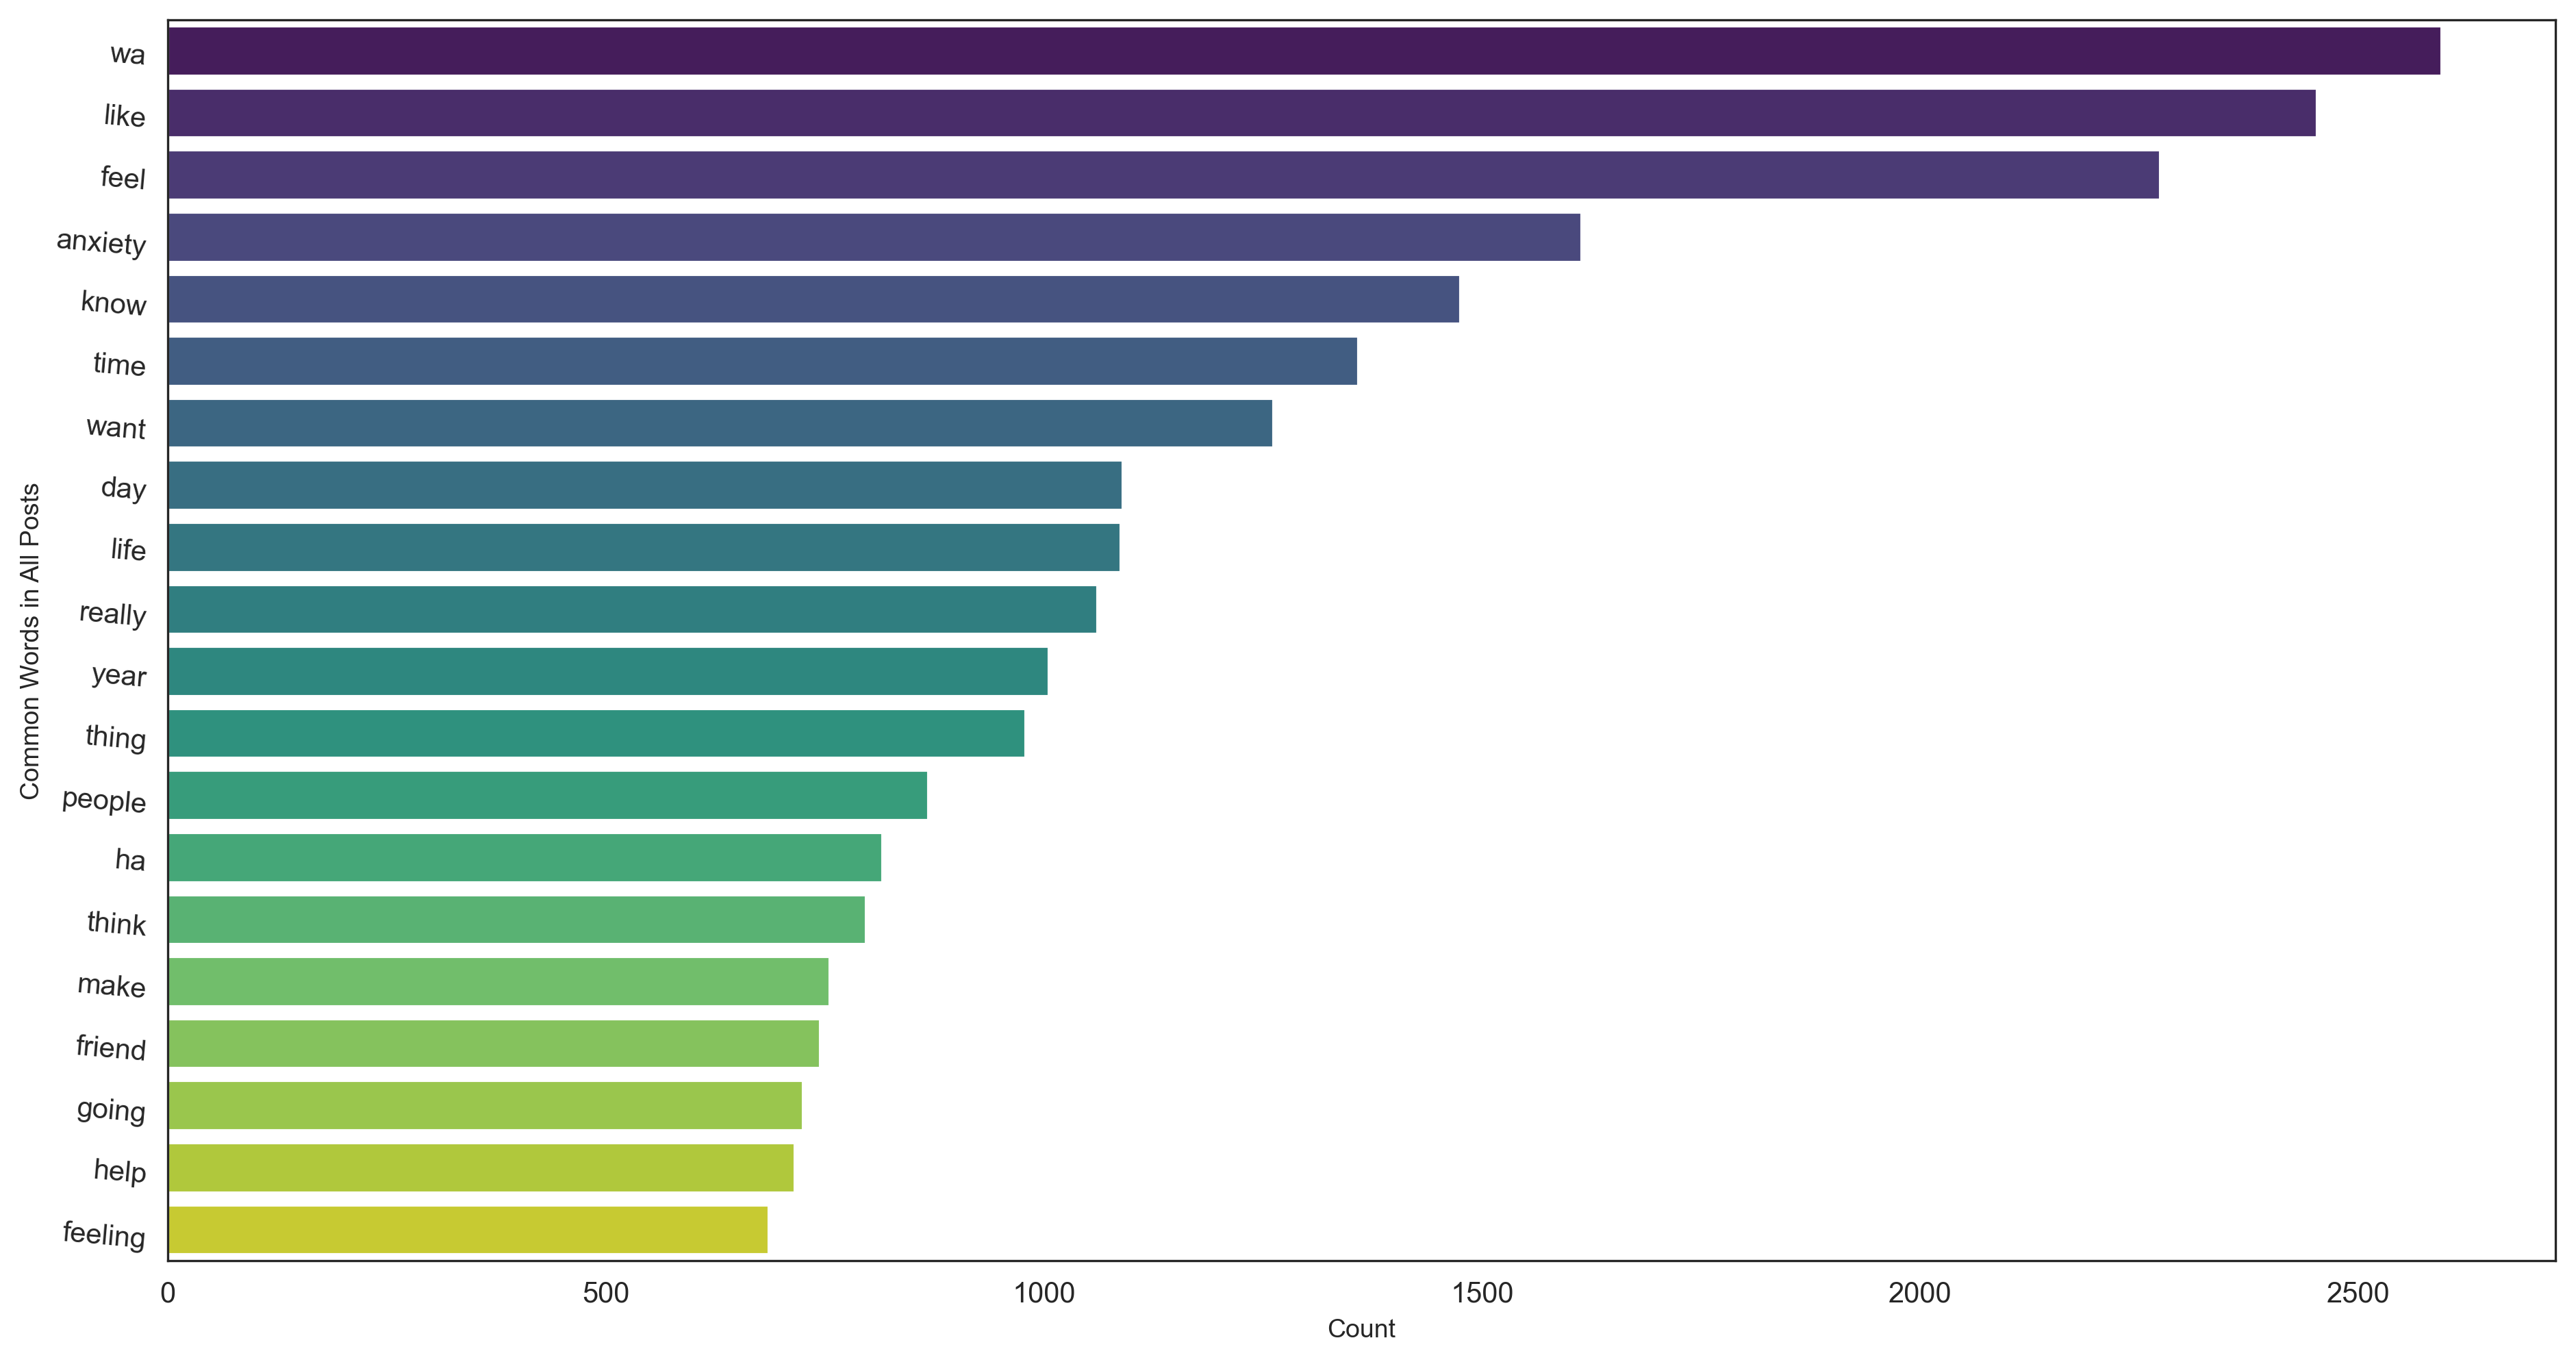

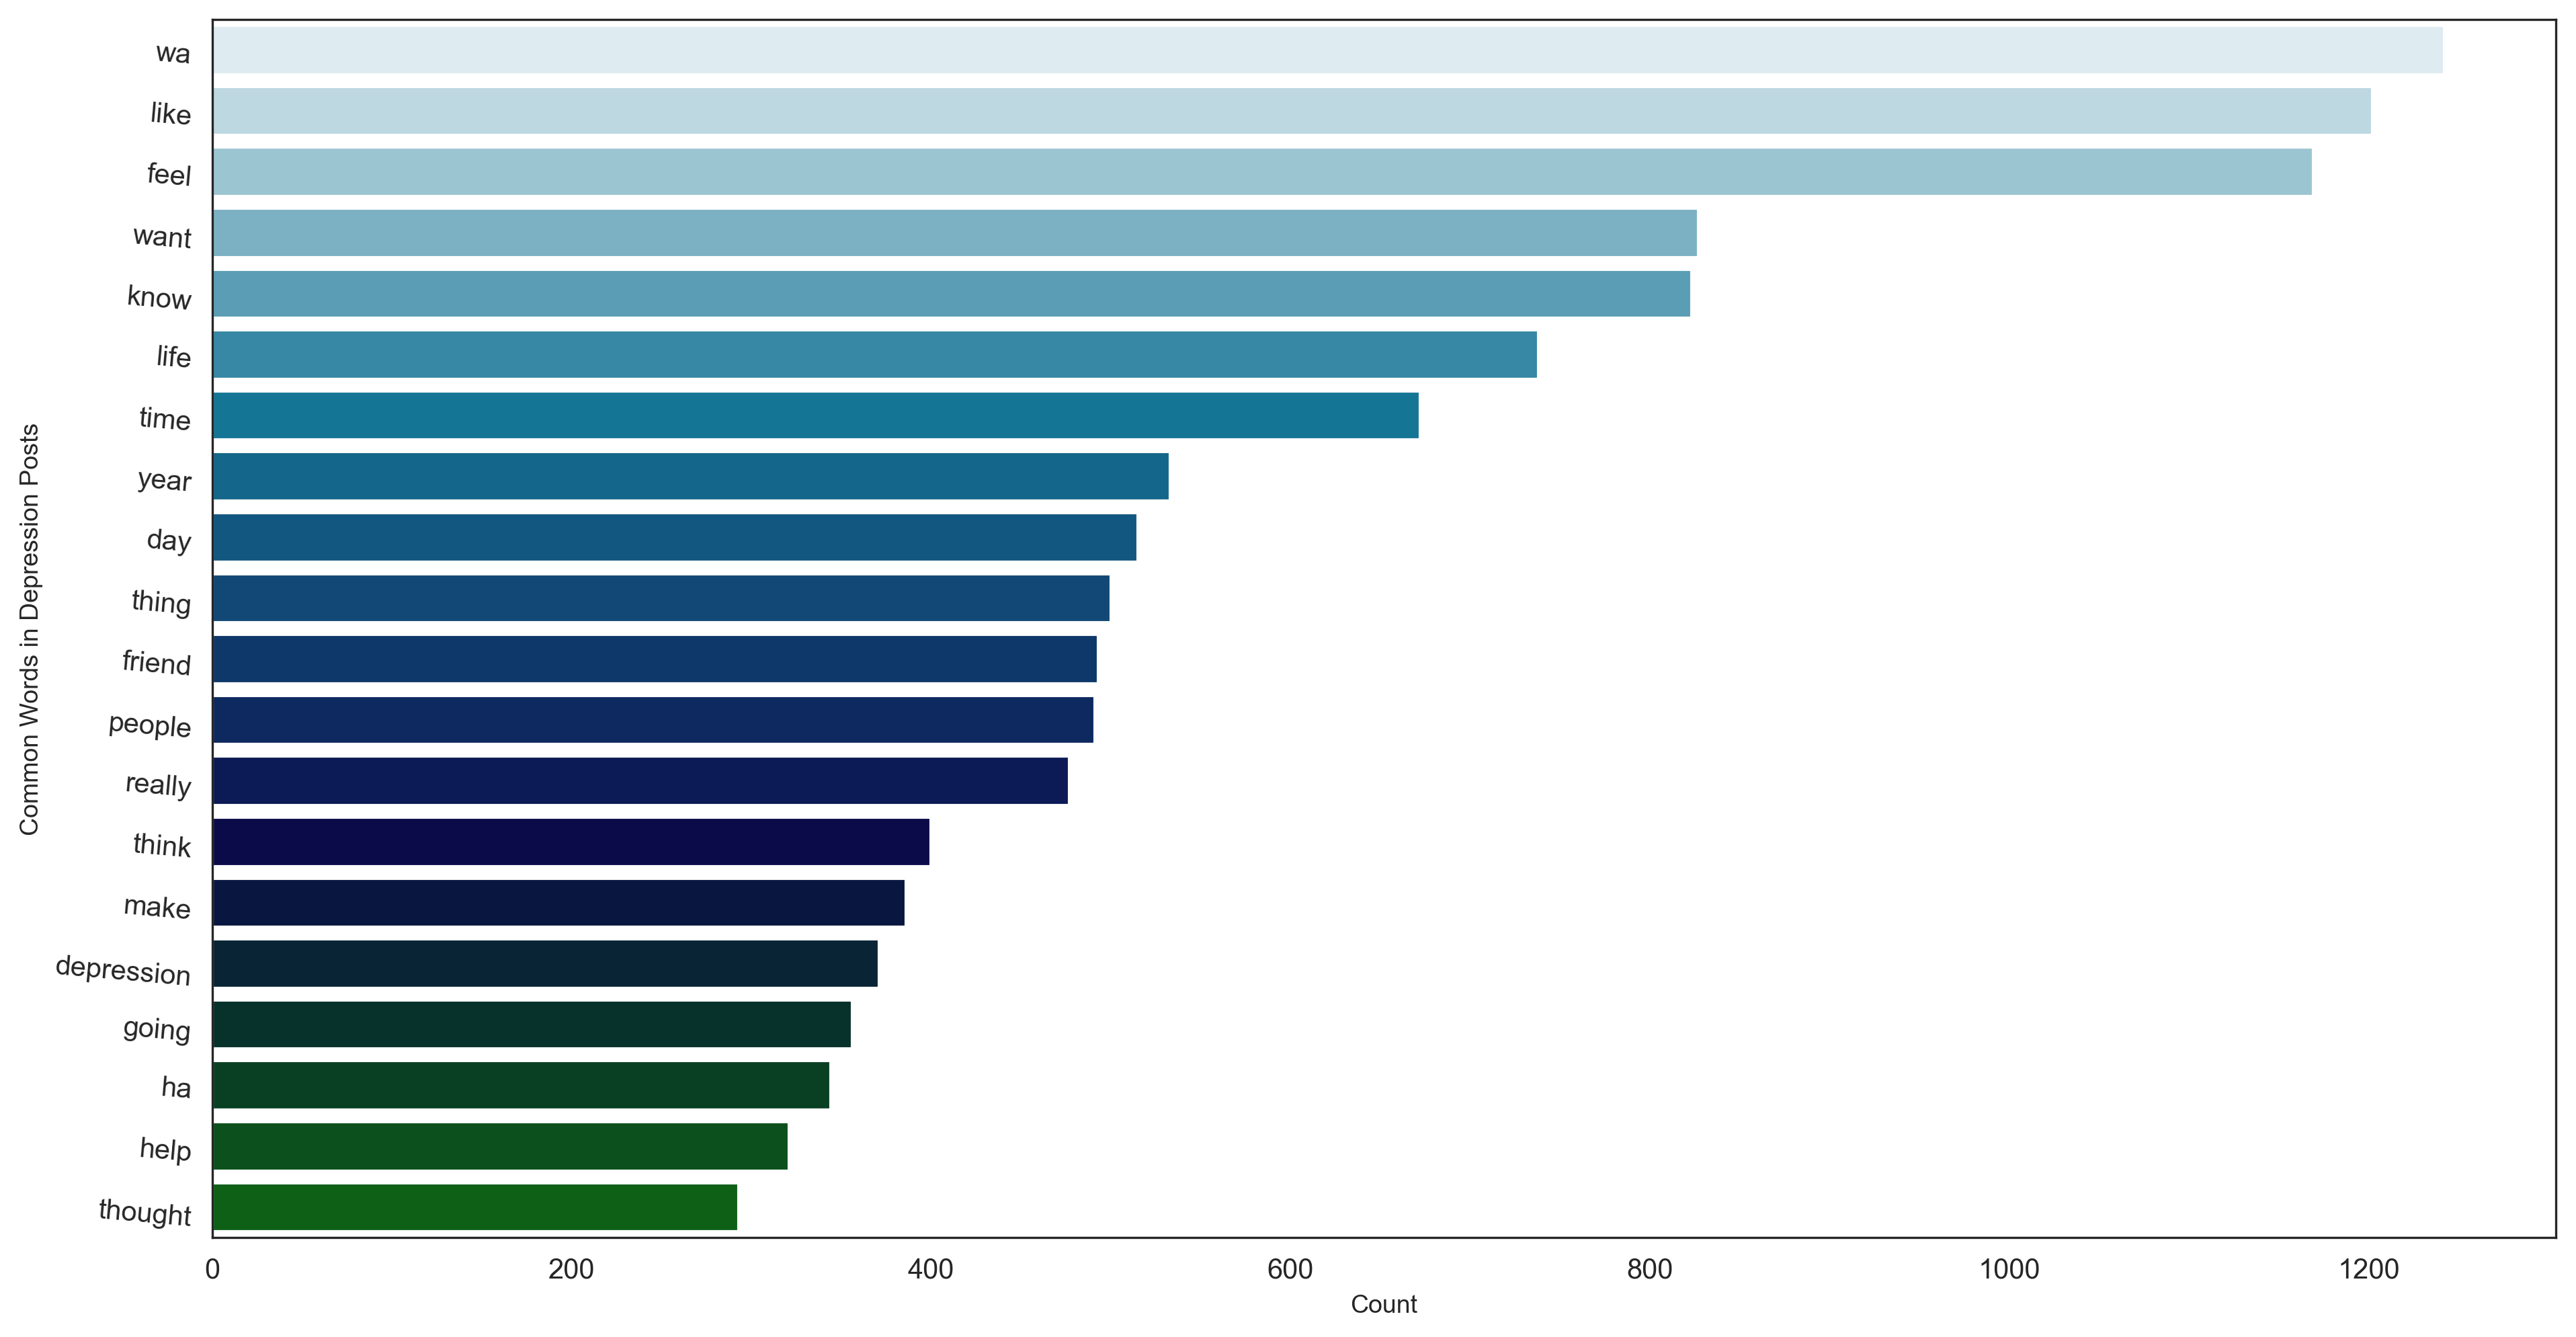

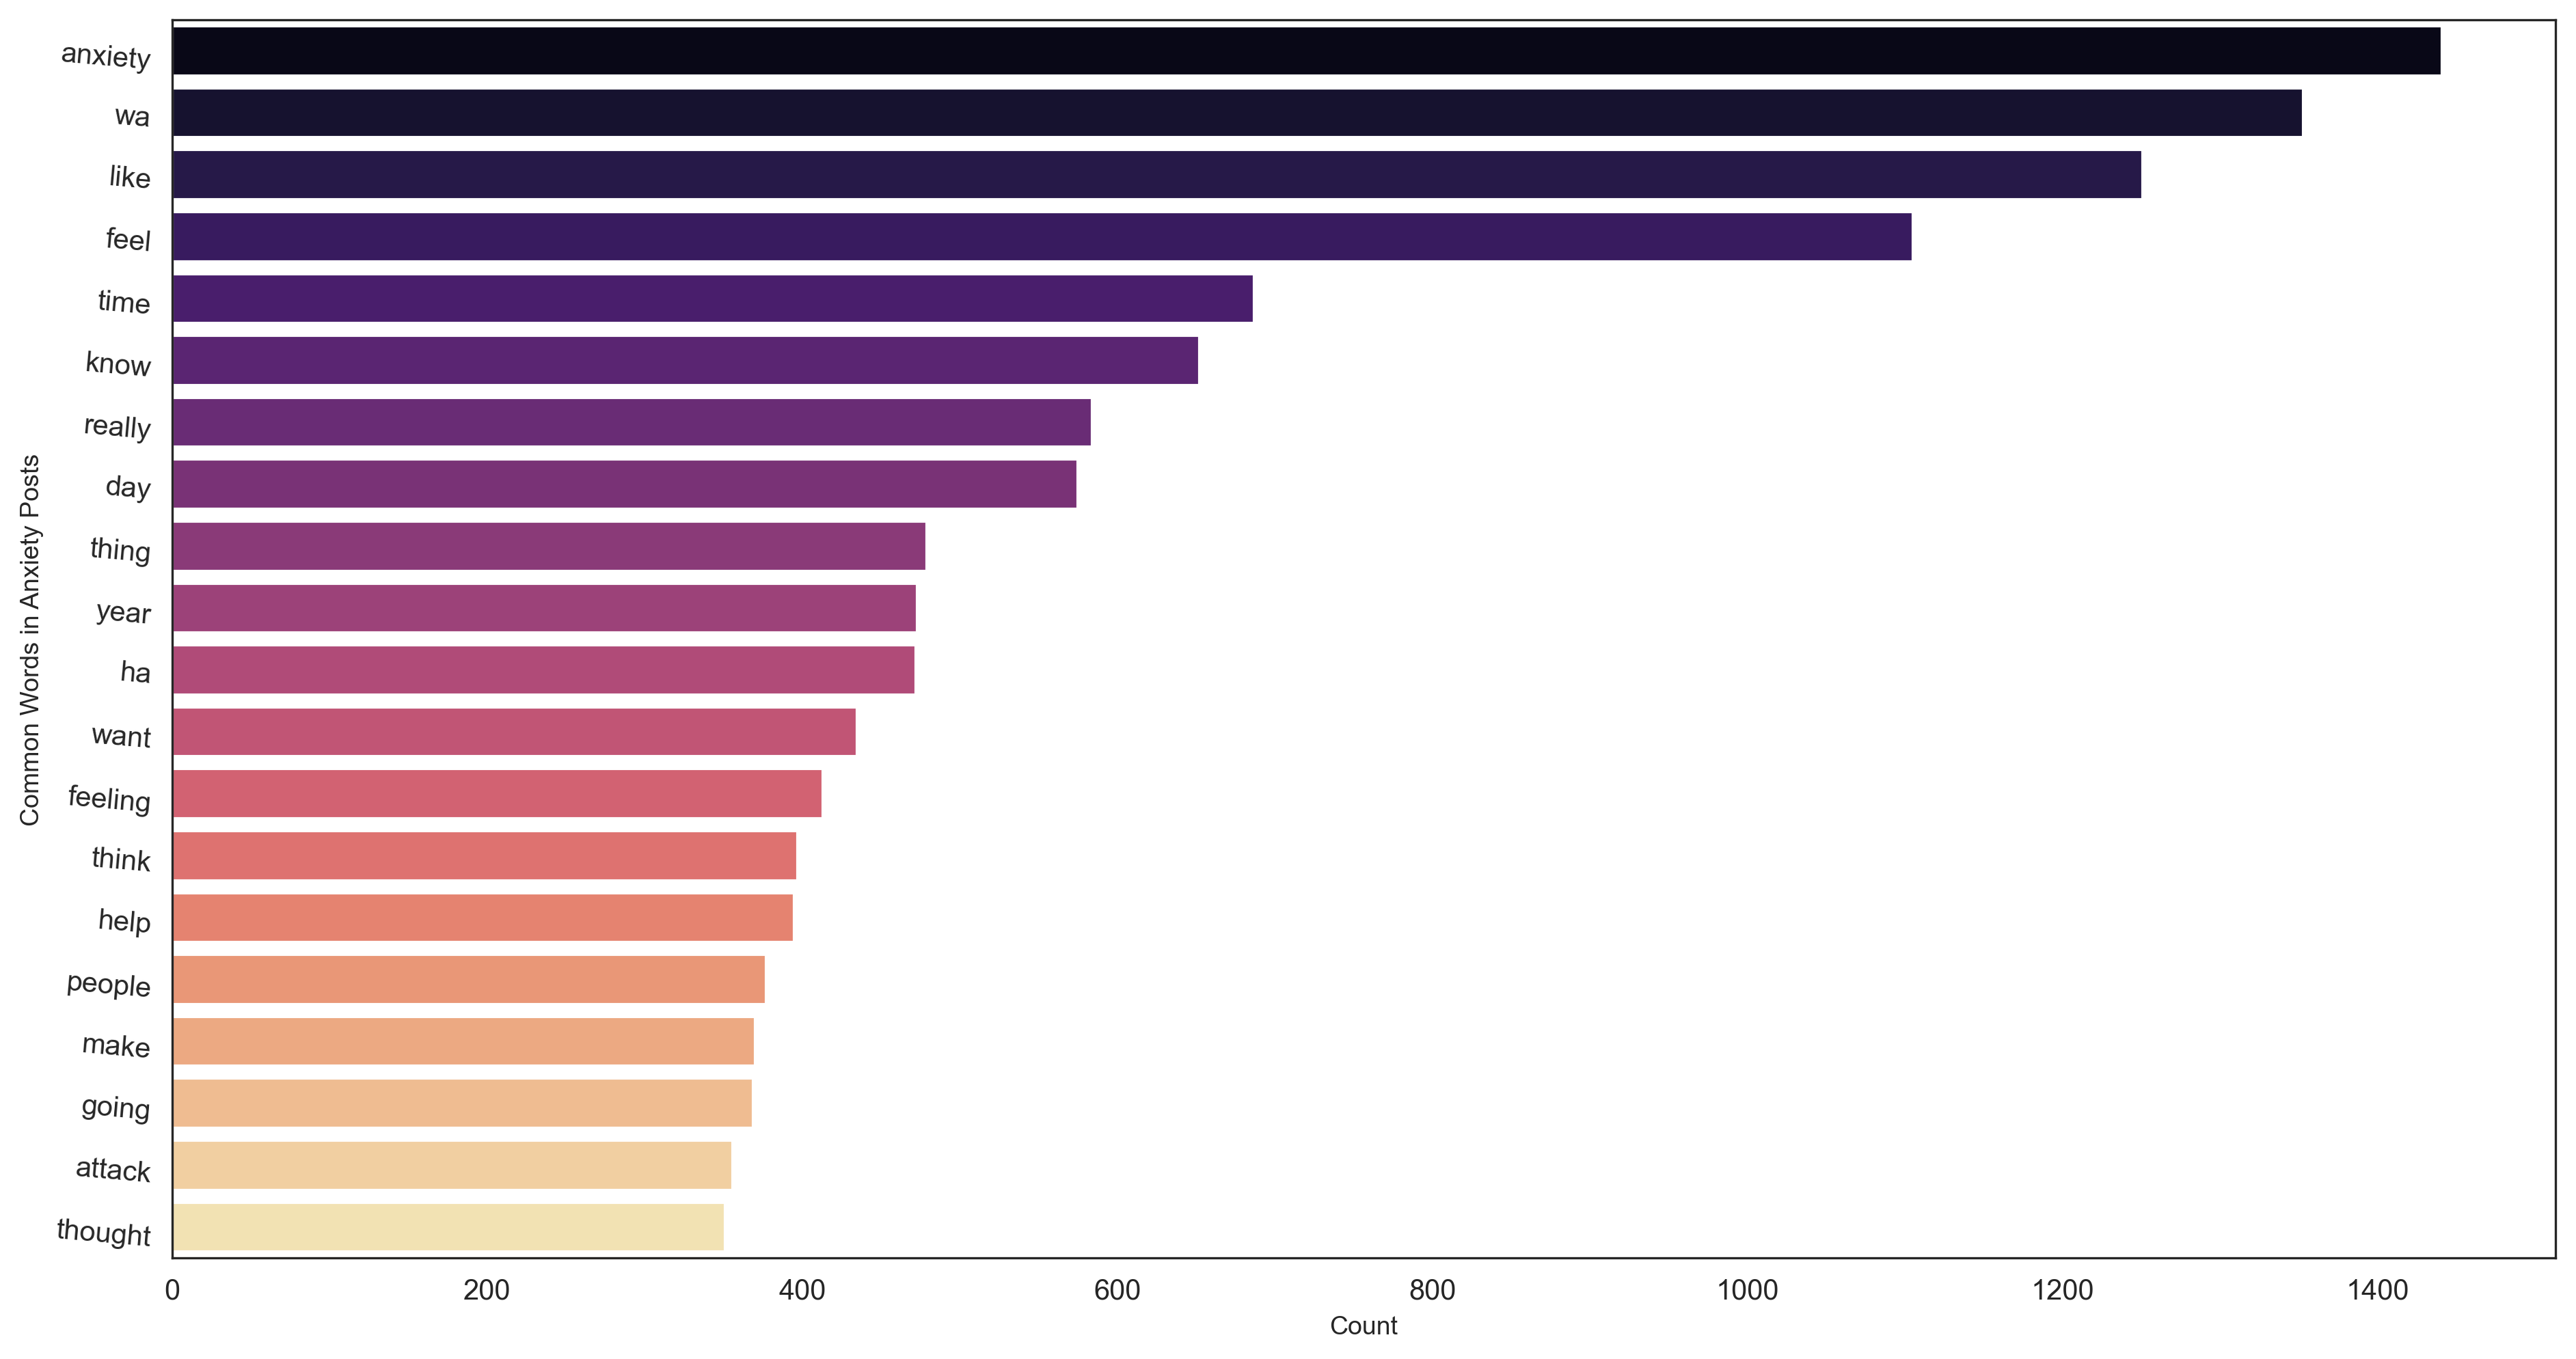

In [126]:
all_words_freq = most_used_words("All Posts", combined_data["selftext_clean"], palette="viridis")

#DEPRESSION
depression_words_freq = most_used_words("Depression Posts", depression_posts, palette="ocean_r")
# most_used_words(depression_titles)
# most_used_words(depression_authors)

# #ANXIETY
anxiety_words_freq = most_used_words("Anxiety Posts", anxiety_posts, palette="magma")
# most_used_words(anxiety_titles)
# most_used_words(anxiety_authors)

In [15]:
def make_1d(df):
    new_list = []
    for elements in df.values.tolist():
        new_list.extend(elements)
    return new_list

In [16]:
print("All posts:", len(combined_data))

print("Depression posts:", len(combined_data[combined_data["is_anxiety"] == 0]))
print("Anxiety posts:", len(combined_data[combined_data["is_anxiety"] == 1]))

All posts: 1930
Depression posts: 932
Anxiety posts: 998


In [110]:
all_1d_broken_sentences = make_1d(combined_data["selftext_broken_sentences"])
all_1d_broken_words = make_1d(combined_data["selftext_broken_words"])

all_1d_unique_broken_words = set(all_1d_broken_words)

print("All sentences count:", len(all_1d_broken_sentences))
print("All words count:", len(all_1d_broken_words))
print("All unique words count:", len(all_1d_unique_broken_words))

All sentences count: 19646
All words count: 162773
All unique words count: 10578


In [111]:
depression_1d_broken_sentences = make_1d(depression_broken_sentences)
depression_1d_broken_words = make_1d(depression_broken_words)
depression_1d_unique_broken_words = set(depression_1d_broken_words)

print("depression sentences count:", len(depression_1d_broken_sentences))
print("depression words count:", len(depression_1d_broken_words))
print("depression Unique words:", len(depression_1d_unique_broken_words))

depression sentences count: 10216
depression words count: 80588
depression Unique words: 7551


In [112]:
anxiety_1d_broken_sentences = make_1d(anxiety_broken_sentences)
anxiety_1d_broken_words = make_1d(anxiety_broken_words)
anxiety_1d_unique_broken_words = set(anxiety_1d_broken_words)

print("anxiety sentences count:", len(anxiety_1d_broken_sentences))
print("anxiety words count:", len(anxiety_1d_broken_words))
print("anxiety Unique words:", len(anxiety_1d_unique_broken_words))

anxiety sentences count: 9430
anxiety words count: 82185
anxiety Unique words: 7492


In [113]:
intersection_words = depression_1d_unique_broken_words.intersection(anxiety_1d_unique_broken_words)
difference_words = depression_1d_unique_broken_words.symmetric_difference(anxiety_1d_unique_broken_words)

print("intersection words count:", len(intersection_words))
print("difference words count:", len(difference_words))

intersection words count: 4465
difference words count: 6113


In [114]:
# depression_words_freq.sort_values(ascending = False).head(20)
# depression_words_freq.loc[list(difference_words)]
# result = depression_words_freq.filter(items=" ", axis=0)

print("Depression top 10 difference words")
df_depression_words_freq = pd.DataFrame({"word": depression_words_freq.index, "count": depression_words_freq.values})
df_depression_words_freq[["word", "count"]][df_depression_words_freq["word"].isin(difference_words)].sort_values("count", ascending = False).head(10)

Depression top 10 difference words


,word,count
2187,eh,22
4119,mil,17
7093,ward,17
3929,lucas,17
628,ba,16
1671,dd,12
2174,education,12
5638,scar,12
4773,pity,11
793,bird,11


In [115]:
print("Anxiety top 10 difference words")
df_anxiety_words_freq = pd.DataFrame({"word": anxiety_words_freq.index, "count": anxiety_words_freq.values})
df_anxiety_words_freq[["word", "count"]][df_anxiety_words_freq["word"].isin(difference_words)].sort_values("count", ascending = False).head(10)

Anxiety top 10 difference words


,word,count
2822,gad,37
6564,tingling,36
243,abortion,21
1046,caffeine,20
4297,nauseous,19
6930,vaccinated,17
4313,needle,16
2086,doom,15
4609,palpitation,15
3363,impending,14


### 2.3.6 TF-IDF

In [137]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict


def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict


def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [138]:
bloblist = [tb(' '.join(depression_1d_broken_words)), tb(' '.join(anxiety_1d_broken_words))]

for i, blob in enumerate(bloblist):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:3]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))

Top words in document 1
	Word: invitation, TF-IDF: 0.0
	Word: privately, TF-IDF: 0.0
	Word: admiration, TF-IDF: 0.0
Top words in document 2
	Word: monthly, TF-IDF: 0.0
	Word: feedback, TF-IDF: 0.0
	Word: upcoming, TF-IDF: 0.0


### 2.3.6 Using Scattertext to visualize  corpus in HTML

In [ ]:
#CREATING A DATAFRAME FOR SCATTERTEXT
combined_data["megatext_clean"] = combined_data["author_clean"] + " " + combined_data["selftext_clean"] + " " + combined_data["title_clean"]
scatter_data = combined_data[["megatext_clean", "is_anxiety"]]
scatter_data["category"] = scatter_data["is_anxiety"].map({0: "Depression", 1: "Anxiety"})
scatter_data.tail()

In [ ]:
#PARSING TEXT FOR SCATTERTEXT
nlp = st.whitespace_nlp_with_sentences
scatter_data.groupby("category").apply(lambda x: x.megatext_clean.apply(lambda x: len(x.split())).sum())
scatter_data['parsed'] = scatter_data.megatext_clean.apply(nlp)
scatter_data.tail()

In [ ]:
#DEFINING A CORPUS FOR SCATTERTEXT VISUALISATION
corpus = st.CorpusFromParsedDocuments(scatter_data, category_col="category", parsed_col="parsed").build()

In [ ]:
#CREATING A SCATTERTEXT PLOT
html = produce_scattertext_explorer(corpus,
                                    category='Depression',
                                    category_name='Depression',
                                    not_category_name='Anxiety',
                                    width_in_pixels=1000,
                                    jitter=0.1,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.percentile,
                                    metadata=scatter_data['category']
                                   )
file_name = '../assets/Reddit_ScattertextRankDataJitter.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

In [ ]:
#SAVING combined_data
combined_data.to_csv('../data/data_for_model.csv', index = False)